In [32]:
from tensorflow import keras

In [33]:
model = keras.models.load_model('./Data/best-cnn-model-27.h5')

In [34]:
# 모델의 layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [35]:
# model의 layer 확인하기
model.layers

### Kernel size (3,3)으로 구성한 이미지 보기

In [36]:
# 32개의 노드로 구성된 layer 선택
conv = model.layers[0] 
print(conv.weights[0].shape , conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [37]:
# 가중치 보기
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.019289106 0.25350487


In [38]:
import matplotlib.pyplot as plt

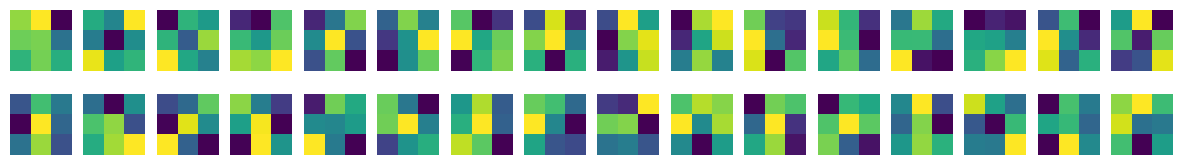

In [39]:
# 이미지 확인하기
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j])
        axs[i,j].axis('off')
plt.show()

### 특성맵 시각화

In [40]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [41]:
# model 불러오기
conv_acti = keras.models.Model(model.input, model.layers[0].output)

In [42]:
(train_input , train_target) , (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

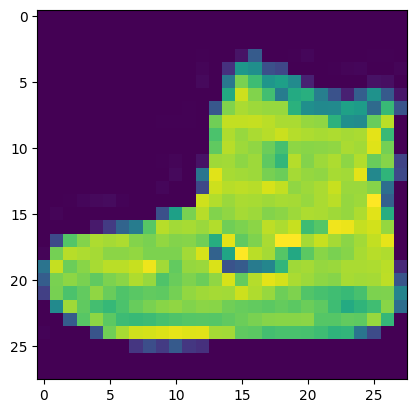

In [43]:
plt.imshow(train_input[0])

In [44]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

1/1 [==============================] - 0s 26ms/step
(1, 28, 28, 32)


- 검은색 값들은 0으로 되고 나머지 값들이 이 신발의 특성이 되는 것이다. 이것이 신발의 특성값?? 모시기 같다.

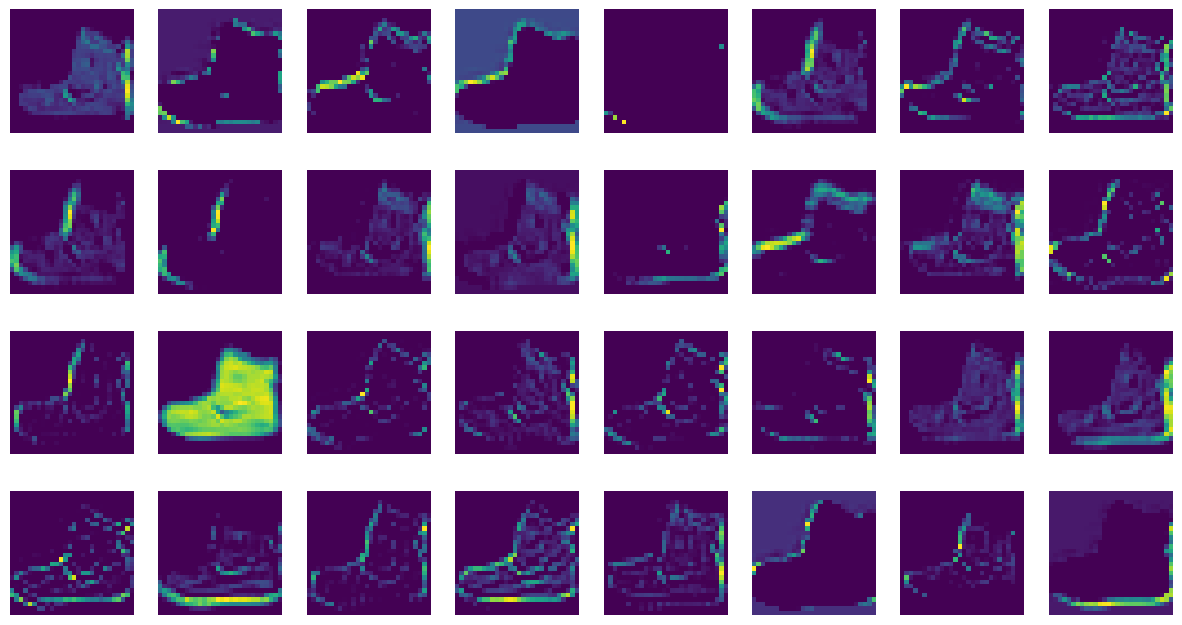

In [46]:
fig , axs = plt.subplots(4,8,figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')

plt.show()